<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [117]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [118]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

##### Your Code Here #####
df = pd.read_csv('/Users/israel/PycharmProjects/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv')

# clean up html description column
def clean_description(df):
    soup = BeautifulSoup(df, 'html.parser')
    clean = soup.get_text()
#     clean = clean.replace("\\n", " ")
#     clean = clean.replace('\\xe2\\x80\\x99', ' ')
#     clean = clean.replace('\\xe2\\x80\\xa6', ' ')
#     clean = clean.replace("\\", '')
#     clean = clean.replace('xe2x80x93', ' ')
    return clean
df['description'] = df['description'].apply(clean_description)
df.drop('Unnamed: 0', axis=1, inplace=True)

## 2) Use Spacy to tokenize the listings 

In [111]:
##### Your Code Here #####
nlp = spacy.load("en_core_web_lg")
def spacy(df):
    doc = nlp(df)
    return ([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
df['description'] = df['description'].apply(spacy)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [124]:
# ##### Your Code Here #####
# vector = CountVectorizer(stop_words='english')
# def vectorize(df):
#     dfdes = df['description']
#     dfdes = dfdes.tolist()
#     flat_list = []
#     for sublist in dfdes:
#         for item in sublist:
#             flat_list.append(item)
#     dfdes = flat_list
#     vector.fit(dfdes)
#     tran = vector.transform(dfdes)
#     return pd.DataFrame(tran.todense(), columns=vector.get_feature_names())
# dmt = vectorize(df)
# dmt

vector = CountVectorizer(stop_words='english')
dfdes = df['description'].tolist()
dfdes

vector.fit(dfdes)
tran = vector.transform(dfdes)
dmt = pd.DataFrame(tran.todense(), columns=vector.get_feature_names())
dmt

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

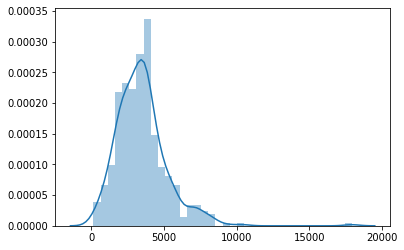

In [125]:
##### Your Code Here #####
doc_len = [len(doc) for doc in dfdes]
import seaborn as sns
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [133]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
dtm = tfidf.fit_transform(dfdes)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,ability,advanced,algorithms,analysis,analytical,analytics,based,best,build,building,...,understanding,use,using,work,working,world,x80,x99s,xe2,years
0,0.242978,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.259776,0.000000,0.0,0.162755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.065257,0.00000,0.00000,0.048413,0.065257,0.000000,0.0,0.145943,0.066036,0.0,...,0.069769,0.000000,0.0,0.087424,0.114089,0.121487,0.369670,0.109078,0.368771,0.000000
2,0.000000,0.18215,0.17986,0.000000,0.167702,0.140157,0.0,0.000000,0.169703,0.0,...,0.000000,0.000000,0.0,0.112333,0.146596,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.222296,0.0,0.268070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.00000,0.000000,0.000000,0.345440,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.292677,0.000000,0.291966,0.316717


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [146]:
##### Your Code Here #####
job_des = ["I would like a high paying job that uses pandas, sql works with dataframes and has a fun environment"]

In [147]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [148]:
job = tfidf.transform(job_des)

In [150]:
nn.kneighbors(job.todense())

(array([[1.20543233, 1.22729763, 1.23410221, 1.24936344, 1.26287775]]),
 array([[ 19, 384, 316, 152, 148]]))

In [152]:
dfdes[384]

"b'MUST HAVE REQUIREMENTSSQL (e.g. HIVE, PostgreSQL, MSSQL, etc.) andPython or R for statistical application developmentExperience in a Hadoop environment and / or statistical development tool (e.g. RapidMiner, Knime) a plus.Efficiently access data via multiple vectors (e.g. NFS, FTP, SSH, SQL, Sqoop, Flume, Spark)RESPONSIBILITIESDevelop and communicate a deep understanding of client needs, perform analytical deep-dives to identify problems, opportunities and specific actions requiredDevelop reproducible and deployable statistical applications on platform such as R/Python/Spark using techniques such as Regression, SVM, and Neural NetworksImplementing processes that improve and lead to greater data qualityConducting statistical analyses to develop strategiesDocumenting all processes and researchBuilding new algorithms and model trainingExecuting projects involving analyticsIdentifying data patterns and trendsAnalyzing data to develop predictive modelsCreating, managing, and maintaining 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 